$$
d_{i}^T A d_{k} = 0
$$

[1. 1.]
[ 0.08823529 -0.05882353]
[0.01176471 0.01764706]
[ 0.00051903 -0.00034602]
[6.92041522e-05 1.03806228e-04]
[ 3.05312436e-06 -2.03541624e-06]
[4.07083248e-07 6.10624873e-07]
[ 1.79595552e-08 -1.19730368e-08]
[2.39460718e-09 3.59191077e-09]


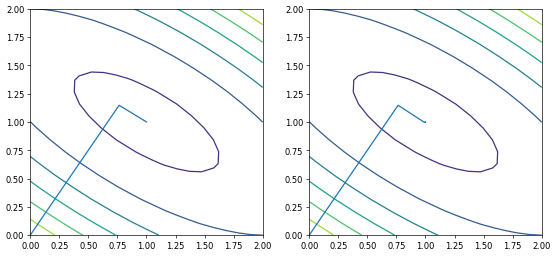

In [93]:
import matplotlib.pyplot as plt
import numpy as np

A = np.array([[1, 1],
              [1, 2]])

b = np.array([2, 3])

def conjugate_gradient(A, b, x):
    r = b - (A@x)
    d = r
    route = np.copy(x)
    for i in range(len(b)):
        denominator = d @ A @ d
        numerator = r @ r
        if denominator == 0:
            print(d)
            print(A)
            print(r)
            print(route)
            raise Exception("conjugate gradient denominator zero")
        alpha = numerator/denominator
        x = x + alpha * d
        rr = r
        r = r - alpha * A @ d
        beta = (r @ r)/(rr @ rr)
        d = r + beta * d
        route = np.vstack((route, x))
    return route

def steepest_descent(A, b, x):
    r = b - A @ x
    route = np.copy(x)
    while np.sqrt(np.sum(r**2)) > 1e-8:
        # line search
        a = (r @ r)/(r @ A @ r)
        x = x + a*r
        r = b - A @ x
        print(r)
        route = np.vstack((route, x))
    return route
        

def draw_contour(ax):
    X, Y = np.mgrid[0:2:20j, 0:2:20j]
    x = X.reshape(1, -1)
    y = Y.reshape(1, -1)
    U = np.vstack((x, y))
    Z = 1/2 * np.sum(U.T * (A @ U).T, axis=1) - (b @ U)
    Z = Z.reshape(X.shape)
    ax.contour(X, Y, Z)
    return

def draw_route(ax, route):
    x, y = route.T[:]
    ax.plot(x, y)

def main():
    fig = plt.figure(figsize=(11,5), dpi=60)
    ax1 = fig.add_subplot(1,2,1)
    ax2 = fig.add_subplot(1,2,2)
    
    print(np.linalg.solve(A, b))
    x0 = np.array([0, 0])

    route1 = conjugate_gradient(A, b, x0)
    draw_contour(ax1)
    draw_route(ax1, route1)
    
    route2 = steepest_descent(A, b, x0)
    draw_contour(ax2)
    draw_route(ax2, route2)

if __name__=="__main__":
    main()